 Sort of helpful: [load_intan_rhd_format in  python](https://plmlab.math.cnrs.fr/xtof/cali-course-2019/-/blob/master/tutorial/analysis_example.org). Only the 'Quick and dirty' steps worked but then was able to access the import function in a different directory so maybe the steps up to there are sufficient or when the command prompt says it can't find the package it doesn't matter lol, just try the function.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# may need to be in the downloaded directory when first loading in the function
# cd /home/annagd/Documents/Python/load_intan_rhd_format)
# or
# cd ~/Documents/Python/load_intan_rhd_format
import load_intan_rhd_format as intan

In [4]:
cd ~/Documents/Python

/home/annagd/Documents/Python


In [5]:
# assumes you are in the directory ~/Documents/Python
data = intan.read_data('../../../../../media/ela2X/intanData/Stargazer/0056/rawData/stg110_20240125_240125_123219.rhd')
data.keys()


Reading Intan Technologies RHD Data File, Version 3.0

Found 256 amplifier channels.
Found 12 auxiliary input channels.
Found 0 supply voltage channels.
Found 2 board ADC channels.
Found 2 board digital input channels.
Found 0 board digital output channels.
Found 0 temperature sensors channels.

File contains 300.002 seconds of data.  Amplifiers were sampled at 30.00 kS/s.

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 29.2 seconds


dict_keys(['spike_triggers', 'amplifier_channels', 'notes', 'frequency_parameters', 'reference_channel', 'aux_input_channels', 'board_adc_channels', 'board_dig_in_channels', 't_amplifier', 'amplifier_data', 't_aux_input', 'aux_input_data', 't_board_adc', 'board_adc_data', 't_dig', 'board_dig_in_data'])

In [6]:
data = pd.DataFrame(data['amplifier_data'])

## 1. Check out the data

In [6]:
def printDF(data):
    print("Electrodes/Rows:", data.shape[0], "\nTime points/Columns:", data.shape[1])
    print("\nTop 5:", data.head())
    print("\nBottom 5:", data.tail())

In [7]:
printDF(data)

Electrodes/Rows: 256 
Time points/Columns: 9000064

Top 5:    0        1        2        3        4        5        6        7        \
0 -466.635 -685.035 -774.930 -700.635 -679.965 -670.605 -661.830 -652.470   
1 -382.785 -671.970 -754.455 -652.860 -625.755 -634.725 -631.800 -616.395   
2 -461.955 -734.565 -835.185 -731.250 -687.570 -691.080 -693.615 -678.210   
3 -410.865 -706.095 -811.590 -717.990 -676.065 -674.505 -670.605 -661.830   
4 -430.755 -736.320 -872.040 -786.240 -742.365 -745.680 -746.265 -737.100   

   8        9        ...  9000054  9000055  9000056  9000057  9000058  \
0 -653.445 -635.115  ... -433.875 -440.895 -432.510 -412.035 -421.785   
1 -609.570 -606.060  ... -321.750 -322.725 -313.170 -305.565 -305.565   
2 -673.140 -667.680  ... -274.755 -253.305 -245.505 -245.310 -240.045   
3 -652.080 -653.640  ... -235.365 -222.300 -212.550 -216.645 -211.965   
4 -722.475 -713.895  ... -172.770 -167.505 -162.045 -166.140 -162.825   

   9000059  9000060  9000061  9000062  

# Sample rate calc

9000064 samples

5 min = 60 * 5 = 300 seconds
9000064/300 => 


Sampling at 30,0000 Hz

In [7]:
def direct_downsample(data, alpha):    
    df = []
    
    for i in range(0, data.shape[1], alpha):
        df.append(data[i])

    return df

## Make different downsampling batches to test empirically later

In [8]:
data_1k_Hz = direct_downsample(data, 30)
data_500_Hz = direct_downsample(data, 60)
data_256_Hz = direct_downsample(data, 117)
data_128_Hz = direct_downsample(data, 234)

In [10]:
# Check downsampling to 1k Hz: 9,000,064/30 => 300,002
# Check downsampling to 500 Hz: 9,000,064/60 => 150,001
# Check downsampling to 256 Hz: 9,000,064/117 => 76,923
# Check downsampling to 128 Hz: 9,000,064/234 => 38,461
df_1k_shape = np.shape(data_500_Hz)
df_500_shape = np.shape(data_1k_Hz)
df_256_shape = np.shape(data_256_Hz)
df_128_shape = np.shape(data_128_Hz)
print("1k Hz Data Shape:", df_1k_shape)
print("\n500 Hz Data Shape:", df_500_shape)
print("\n256 Hz Data Shape:", df_256_shape)
print("\n128 Hz Data Shape:", df_128_shape)

1k Hz Data Shape: (150002, 256)

500 Hz Data Shape: (300003, 256)

256 Hz Data Shape: (76924, 256)

128 Hz Data Shape: (38462, 256)


In [11]:
pd.DataFrame(data_1k_Hz)

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-466.635,-382.785,-461.955,-410.865,-430.755,-503.880,-529.815,-477.555,-526.110,-466.440,...,-462.540,-561.015,-775.125,-848.640,-703.170,-550.485,-746.265,-710.190,-573.105,-492.765
30,-601.380,-564.720,-608.205,-585.585,-648.570,-696.540,-694.200,-654.810,-611.130,-448.500,...,-395.265,-551.460,-839.085,-908.505,-780.975,-663.000,-833.235,-797.550,-656.175,-516.165
60,-494.130,-466.830,-538.590,-475.020,-535.080,-585.195,-576.810,-539.760,-500.565,-387.075,...,-321.165,-468.000,-736.320,-799.500,-686.595,-586.950,-737.100,-712.920,-568.620,-425.490
90,-424.125,-367.185,-416.520,-406.965,-444.015,-474.045,-471.315,-456.885,-435.045,-327.405,...,-299.715,-409.305,-640.965,-687.180,-577.005,-494.520,-635.700,-612.495,-468.780,-361.920
120,-376.155,-300.300,-344.370,-299.520,-334.425,-370.305,-379.470,-353.145,-355.875,-290.550,...,-230.685,-362.700,-545.220,-597.870,-487.110,-396.435,-523.380,-503.880,-367.770,-270.660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999940,-596.700,-491.400,-436.020,-386.685,-382.200,-382.005,-385.320,-356.460,-320.385,-301.470,...,-309.855,-309.465,-346.125,-346.905,-320.190,-295.425,-316.875,-328.380,-402.090,-539.175
8999970,-588.315,-472.290,-441.285,-378.105,-350.610,-366.990,-375.180,-347.685,-302.835,-299.130,...,-284.895,-273.975,-332.085,-330.915,-299.130,-283.725,-317.460,-311.610,-386.685,-513.825
9000000,-546.780,-422.760,-372.645,-320.385,-284.700,-302.835,-323.310,-294.450,-287.040,-300.690,...,-271.830,-257.205,-279.630,-285.285,-252.135,-233.805,-262.665,-260.130,-341.250,-482.430
9000030,-486.330,-352.950,-293.670,-255.840,-210.600,-225.810,-245.115,-219.765,-235.755,-252.135,...,-229.905,-195.585,-197.730,-210.990,-166.920,-144.885,-184.860,-173.355,-249.990,-409.500


In [12]:
pd.DataFrame(data_500_Hz)

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-466.635,-382.785,-461.955,-410.865,-430.755,-503.880,-529.815,-477.555,-526.110,-466.440,...,-462.540,-561.015,-775.125,-848.640,-703.170,-550.485,-746.265,-710.190,-573.105,-492.765
60,-494.130,-466.830,-538.590,-475.020,-535.080,-585.195,-576.810,-539.760,-500.565,-387.075,...,-321.165,-468.000,-736.320,-799.500,-686.595,-586.950,-737.100,-712.920,-568.620,-425.490
120,-376.155,-300.300,-344.370,-299.520,-334.425,-370.305,-379.470,-353.145,-355.875,-290.550,...,-230.685,-362.700,-545.220,-597.870,-487.110,-396.435,-523.380,-503.880,-367.770,-270.660
180,-333.450,-279.435,-320.190,-299.325,-304.005,-339.885,-359.190,-334.620,-338.520,-278.070,...,-242.190,-324.480,-515.580,-574.275,-469.950,-366.015,-505.440,-483.990,-335.790,-240.435
240,-452.400,-421.395,-473.265,-422.760,-482.625,-508.950,-530.205,-503.100,-476.190,-344.955,...,-303.030,-482.235,-717.405,-777.270,-660.465,-575.250,-728.520,-709.215,-542.685,-405.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999820,-598.260,-435.435,-380.055,-324.675,-225.420,-228.150,-268.710,-232.635,-250.380,-318.045,...,-284.310,-211.185,-171.600,-193.245,-140.010,-101.400,-149.370,-131.430,-202.215,-396.435
8999880,-616.785,-476.775,-443.625,-378.105,-309.075,-314.145,-342.420,-317.850,-299.325,-314.535,...,-314.535,-287.430,-251.355,-273.585,-237.705,-190.320,-232.050,-217.425,-305.370,-479.895
8999940,-596.700,-491.400,-436.020,-386.685,-382.200,-382.005,-385.320,-356.460,-320.385,-301.470,...,-309.855,-309.465,-346.125,-346.905,-320.190,-295.425,-316.875,-328.380,-402.090,-539.175
9000000,-546.780,-422.760,-372.645,-320.385,-284.700,-302.835,-323.310,-294.450,-287.040,-300.690,...,-271.830,-257.205,-279.630,-285.285,-252.135,-233.805,-262.665,-260.130,-341.250,-482.430


In [13]:
pd.DataFrame(data_256_Hz)

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-466.635,-382.785,-461.955,-410.865,-430.755,-503.880,-529.815,-477.555,-526.110,-466.440,...,-462.540,-561.015,-775.125,-848.640,-703.170,-550.485,-746.265,-710.190,-573.105,-492.765
117,-387.270,-299.130,-356.655,-319.995,-340.665,-376.935,-386.685,-366.990,-362.310,-296.790,...,-243.945,-355.095,-558.090,-604.695,-496.275,-408.135,-537.420,-515.775,-374.205,-274.755
234,-430.365,-414.570,-459.030,-419.640,-479.505,-491.790,-513.630,-477.165,-452.400,-343.395,...,-317.460,-465.660,-696.735,-763.815,-635.505,-560.820,-707.850,-688.545,-526.500,-380.640
351,-510.120,-436.995,-483.405,-444.015,-474.435,-495.495,-530.595,-498.420,-494.910,-450.645,...,-374.010,-516.360,-742.365,-809.835,-670.410,-564.330,-744.120,-720.135,-536.835,-399.360
468,-510.315,-433.875,-497.445,-451.425,-490.425,-478.530,-513.825,-478.140,-509.535,-455.910,...,-399.750,-508.365,-725.790,-764.205,-633.945,-536.250,-711.360,-688.350,-521.040,-410.280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999523,-461.370,-392.925,-382.785,-347.100,-258.375,-227.175,-251.745,-223.080,-231.075,-260.910,...,-228.345,-196.560,-197.730,-181.935,-171.210,-142.350,-178.815,-151.905,-187.395,-322.140
8999640,-530.985,-428.415,-386.685,-343.200,-317.655,-261.300,-292.305,-270.660,-280.800,-247.260,...,-247.455,-244.335,-239.265,-255.840,-223.470,-168.870,-218.205,-213.915,-258.570,-407.550
8999757,-562.380,-438.165,-382.005,-332.865,-302.640,-287.820,-295.230,-274.755,-257.400,-276.900,...,-255.450,-230.685,-240.630,-242.970,-219.960,-193.830,-238.875,-221.910,-277.290,-440.505
8999874,-628.680,-499.395,-460.980,-379.080,-310.440,-307.515,-350.220,-314.340,-317.070,-323.115,...,-320.580,-282.555,-238.485,-257.985,-215.085,-181.155,-223.860,-204.750,-292.695,-477.555


In [14]:
pd.DataFrame(data_128_Hz)

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-466.635,-382.785,-461.955,-410.865,-430.755,-503.880,-529.815,-477.555,-526.110,-466.440,...,-462.540,-561.015,-775.125,-848.640,-703.170,-550.485,-746.265,-710.190,-573.105,-492.765
234,-430.365,-414.570,-459.030,-419.640,-479.505,-491.790,-513.630,-477.165,-452.400,-343.395,...,-317.460,-465.660,-696.735,-763.815,-635.505,-560.820,-707.850,-688.545,-526.500,-380.640
468,-510.315,-433.875,-497.445,-451.425,-490.425,-478.530,-513.825,-478.140,-509.535,-455.910,...,-399.750,-508.365,-725.790,-764.205,-633.945,-536.250,-711.360,-688.350,-521.040,-410.280
702,-302.055,-239.655,-318.435,-281.775,-283.530,-282.555,-318.630,-277.680,-319.410,-288.405,...,-237.705,-329.940,-511.290,-538.980,-445.575,-363.675,-510.900,-472.875,-335.205,-232.050
936,-414.570,-323.700,-382.395,-333.060,-331.500,-355.290,-375.570,-338.130,-407.355,-409.500,...,-373.620,-412.620,-550.485,-609.180,-464.685,-380.250,-531.765,-493.545,-345.930,-281.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8998938,66.690,26.520,24.180,6.045,7.215,9.360,16.965,45.630,70.200,132.600,...,172.965,81.900,17.550,33.150,-5.655,-33.150,-31.005,-27.690,-9.750,49.140
8999172,-128.115,-147.420,-158.340,-132.015,-103.350,-95.160,-119.145,-72.345,-63.765,-43.875,...,33.930,-39.780,-61.425,-51.675,-80.925,-77.220,-101.205,-83.655,-81.315,-70.395
8999406,-383.760,-346.515,-340.275,-324.870,-255.060,-220.935,-259.740,-219.960,-208.650,-188.370,...,-143.520,-195.195,-192.855,-191.295,-192.270,-164.385,-191.880,-172.575,-202.995,-264.420
8999640,-530.985,-428.415,-386.685,-343.200,-317.655,-261.300,-292.305,-270.660,-280.800,-247.260,...,-247.455,-244.335,-239.265,-255.840,-223.470,-168.870,-218.205,-213.915,-258.570,-407.550


In [15]:
plt.plot(data_1k_Hz);

Error in callback <function _draw_all_if_interactive at 0x7d7a1f564040> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7d79975f04c0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

KeyboardInterrupt: 

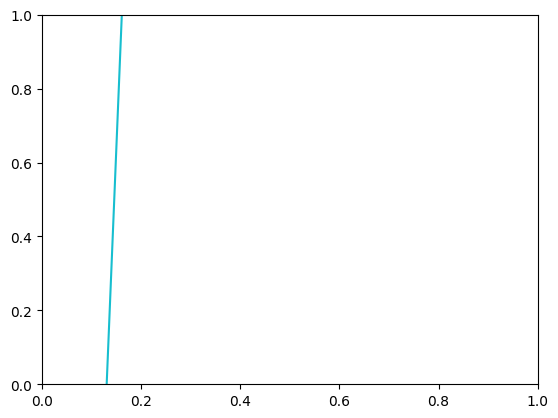

In [16]:
plt.plot(data_500_Hz);

In [ ]:
plt.plot(data_256_Hz);

In [ ]:
plt.plot(data_128_Hz);

# Convert to seconds

### Example with original data

In [ ]:
data.tail()

In [ ]:
data.columns

In [ ]:
data.shape[1]

In [9]:
samples = data.shape[1]

# sample/sec
sampling_rate = 30000

# number of seconds in the recording batch =
secs = samples/sampling_rate
print("Total Time (sec):", secs)

# get step size for making the new column labels corresponding to time in seconds = 
sample_interval = secs/samples
print("Sample Interval:", sample_interval)

# in seconds
current_time = 0
current_time + (data.columns * sample_interval)

Total Time (sec): 300.00213333333335
Sample Interval: 3.3333333333333335e-05


Index([                   0.0, 3.3333333333333335e-05,  6.666666666666667e-05,
                       0.0001, 0.00013333333333333334,  0.0001666666666666667,
                       0.0002, 0.00023333333333333333,  0.0002666666666666667,
       0.00030000000000000003,
       ...
                     300.0018,     300.00183333333337,      300.0018666666667,
           300.00190000000003,     300.00193333333334,      300.0019666666667,
                      300.002,      300.0020333333334,      300.0020666666667,
           300.00210000000004],
      dtype='float64', length=9000064)

### Example with downsampled data

In [18]:
data_128_Hz = pd.DataFrame(data_128_Hz)
data_128_Hz.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
8999640,-530.985,-428.415,-386.685,-343.20,-317.655,-261.300,-292.305,-270.66,-280.80,-247.260,...,-247.455,-244.335,-239.265,-255.840,-223.470,-168.870,-218.205,-213.915,-258.570,-407.550
8999874,-628.680,-499.395,-460.980,-379.08,-310.440,-307.515,-350.220,-314.34,-317.07,-323.115,...,-320.580,-282.555,-238.485,-257.985,-215.085,-181.155,-223.860,-204.750,-292.695,-477.555


In [ ]:
data_128_Hz.index

In [ ]:
data_128_Hz.shape[0]

In [ ]:
print("Size:", np.shape(np.arange(0, samples))[0])
np.arange(0, samples)

In [19]:
samples = data_128_Hz.shape[0]

# factor the original data has been downsampled by
alpha = 234
# sample/sec
sampling_rate = 30000/alpha

# number of seconds in the recording batch =
secs = samples/sampling_rate
print("Total Time (sec):", secs)

# get step size for making the new column labels corresponding to time in seconds = 
sample_interval = (secs/samples)
print("Sample Interval:", sample_interval)

# in seconds
current_time = 0
new_index = np.arange(0, samples)
current_time + (new_index * sample_interval)

Total Time (sec): 300.0036
Sample Interval: 0.0078000000000000005


array([0.000000e+00, 7.800000e-03, 1.560000e-02, ..., 2.999802e+02,
       2.999880e+02, 2.999958e+02])

In [1]:
def samples_to_seconds(df, samples, sampling_rate, current_time, alpha):    
    # number of seconds in the recording batch =
    # the sampling rate is lower by the factor of the factor used to downsample
    secs = samples/(sampling_rate/alpha)
    print("Total Time (sec):", secs)
    
    # get step size for making the new column labels corresponding to time in seconds = 
    sample_interval = secs/samples
    print("Sample Interval:", sample_interval)

    new_index = np.arange(0, samples)
    df.index = current_time + (new_index * sample_interval)
    
    return df

In [21]:
data_128_Hz.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
8999640,-530.985,-428.415,-386.685,-343.20,-317.655,-261.300,-292.305,-270.66,-280.80,-247.260,...,-247.455,-244.335,-239.265,-255.840,-223.470,-168.870,-218.205,-213.915,-258.570,-407.550
8999874,-628.680,-499.395,-460.980,-379.08,-310.440,-307.515,-350.220,-314.34,-317.07,-323.115,...,-320.580,-282.555,-238.485,-257.985,-215.085,-181.155,-223.860,-204.750,-292.695,-477.555


In [56]:
samples_to_seconds(data_128_Hz, data_128_Hz.shape[0], 30000, 0, 234)

Total Time (sec): 300.0036
Sample Interval: 0.0078000000000000005


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0.0000,-466.635,-382.785,-461.955,-410.865,-430.755,-503.880,-529.815,-477.555,-526.110,-466.440,...,-462.540,-561.015,-775.125,-848.640,-703.170,-550.485,-746.265,-710.190,-573.105,-492.765
0.0078,-430.365,-414.570,-459.030,-419.640,-479.505,-491.790,-513.630,-477.165,-452.400,-343.395,...,-317.460,-465.660,-696.735,-763.815,-635.505,-560.820,-707.850,-688.545,-526.500,-380.640
0.0156,-510.315,-433.875,-497.445,-451.425,-490.425,-478.530,-513.825,-478.140,-509.535,-455.910,...,-399.750,-508.365,-725.790,-764.205,-633.945,-536.250,-711.360,-688.350,-521.040,-410.280
0.0234,-302.055,-239.655,-318.435,-281.775,-283.530,-282.555,-318.630,-277.680,-319.410,-288.405,...,-237.705,-329.940,-511.290,-538.980,-445.575,-363.675,-510.900,-472.875,-335.205,-232.050
0.0312,-414.570,-323.700,-382.395,-333.060,-331.500,-355.290,-375.570,-338.130,-407.355,-409.500,...,-373.620,-412.620,-550.485,-609.180,-464.685,-380.250,-531.765,-493.545,-345.930,-281.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299.9646,66.690,26.520,24.180,6.045,7.215,9.360,16.965,45.630,70.200,132.600,...,172.965,81.900,17.550,33.150,-5.655,-33.150,-31.005,-27.690,-9.750,49.140
299.9724,-128.115,-147.420,-158.340,-132.015,-103.350,-95.160,-119.145,-72.345,-63.765,-43.875,...,33.930,-39.780,-61.425,-51.675,-80.925,-77.220,-101.205,-83.655,-81.315,-70.395
299.9802,-383.760,-346.515,-340.275,-324.870,-255.060,-220.935,-259.740,-219.960,-208.650,-188.370,...,-143.520,-195.195,-192.855,-191.295,-192.270,-164.385,-191.880,-172.575,-202.995,-264.420
299.9880,-530.985,-428.415,-386.685,-343.200,-317.655,-261.300,-292.305,-270.660,-280.800,-247.260,...,-247.455,-244.335,-239.265,-255.840,-223.470,-168.870,-218.205,-213.915,-258.570,-407.550


In [23]:
data_128_Hz.index[-1]

np.float64(299.99580000000003)

In [24]:
samples_to_seconds(data_128_Hz, data_128_Hz.shape[0], 30000, data_128_Hz.index[-1], 234)

Total Time (sec): 300.0036
Sample Interval: 0.0078000000000000005


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
299.9958,-466.635,-382.785,-461.955,-410.865,-430.755,-503.880,-529.815,-477.555,-526.110,-466.440,...,-462.540,-561.015,-775.125,-848.640,-703.170,-550.485,-746.265,-710.190,-573.105,-492.765
300.0036,-430.365,-414.570,-459.030,-419.640,-479.505,-491.790,-513.630,-477.165,-452.400,-343.395,...,-317.460,-465.660,-696.735,-763.815,-635.505,-560.820,-707.850,-688.545,-526.500,-380.640
300.0114,-510.315,-433.875,-497.445,-451.425,-490.425,-478.530,-513.825,-478.140,-509.535,-455.910,...,-399.750,-508.365,-725.790,-764.205,-633.945,-536.250,-711.360,-688.350,-521.040,-410.280
300.0192,-302.055,-239.655,-318.435,-281.775,-283.530,-282.555,-318.630,-277.680,-319.410,-288.405,...,-237.705,-329.940,-511.290,-538.980,-445.575,-363.675,-510.900,-472.875,-335.205,-232.050
300.0270,-414.570,-323.700,-382.395,-333.060,-331.500,-355.290,-375.570,-338.130,-407.355,-409.500,...,-373.620,-412.620,-550.485,-609.180,-464.685,-380.250,-531.765,-493.545,-345.930,-281.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599.9604,66.690,26.520,24.180,6.045,7.215,9.360,16.965,45.630,70.200,132.600,...,172.965,81.900,17.550,33.150,-5.655,-33.150,-31.005,-27.690,-9.750,49.140
599.9682,-128.115,-147.420,-158.340,-132.015,-103.350,-95.160,-119.145,-72.345,-63.765,-43.875,...,33.930,-39.780,-61.425,-51.675,-80.925,-77.220,-101.205,-83.655,-81.315,-70.395
599.9760,-383.760,-346.515,-340.275,-324.870,-255.060,-220.935,-259.740,-219.960,-208.650,-188.370,...,-143.520,-195.195,-192.855,-191.295,-192.270,-164.385,-191.880,-172.575,-202.995,-264.420
599.9838,-530.985,-428.415,-386.685,-343.200,-317.655,-261.300,-292.305,-270.660,-280.800,-247.260,...,-247.455,-244.335,-239.265,-255.840,-223.470,-168.870,-218.205,-213.915,-258.570,-407.550


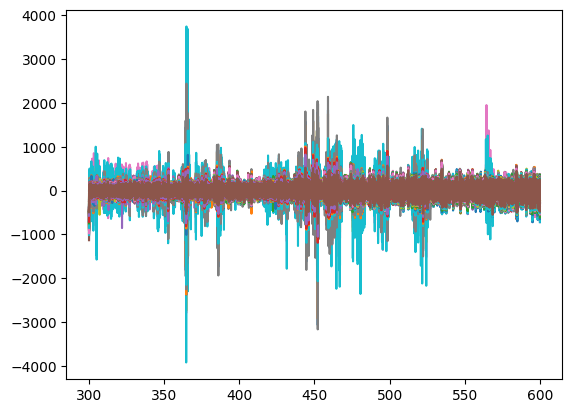

In [25]:
plt.plot(data_128_Hz);

In [52]:
data_256_Hz = pd.DataFrame(data_256_Hz)
samples_to_seconds(data_256_Hz, data_256_Hz.shape[0], 30000, 0, 117)

Total Time (sec): 300.0036
Sample Interval: 0.0039000000000000003


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0.0000,-466.635,-382.785,-461.955,-410.865,-430.755,-503.880,-529.815,-477.555,-526.110,-466.440,...,-462.540,-561.015,-775.125,-848.640,-703.170,-550.485,-746.265,-710.190,-573.105,-492.765
0.0039,-387.270,-299.130,-356.655,-319.995,-340.665,-376.935,-386.685,-366.990,-362.310,-296.790,...,-243.945,-355.095,-558.090,-604.695,-496.275,-408.135,-537.420,-515.775,-374.205,-274.755
0.0078,-430.365,-414.570,-459.030,-419.640,-479.505,-491.790,-513.630,-477.165,-452.400,-343.395,...,-317.460,-465.660,-696.735,-763.815,-635.505,-560.820,-707.850,-688.545,-526.500,-380.640
0.0117,-510.120,-436.995,-483.405,-444.015,-474.435,-495.495,-530.595,-498.420,-494.910,-450.645,...,-374.010,-516.360,-742.365,-809.835,-670.410,-564.330,-744.120,-720.135,-536.835,-399.360
0.0156,-510.315,-433.875,-497.445,-451.425,-490.425,-478.530,-513.825,-478.140,-509.535,-455.910,...,-399.750,-508.365,-725.790,-764.205,-633.945,-536.250,-711.360,-688.350,-521.040,-410.280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299.9841,-461.370,-392.925,-382.785,-347.100,-258.375,-227.175,-251.745,-223.080,-231.075,-260.910,...,-228.345,-196.560,-197.730,-181.935,-171.210,-142.350,-178.815,-151.905,-187.395,-322.140
299.9880,-530.985,-428.415,-386.685,-343.200,-317.655,-261.300,-292.305,-270.660,-280.800,-247.260,...,-247.455,-244.335,-239.265,-255.840,-223.470,-168.870,-218.205,-213.915,-258.570,-407.550
299.9919,-562.380,-438.165,-382.005,-332.865,-302.640,-287.820,-295.230,-274.755,-257.400,-276.900,...,-255.450,-230.685,-240.630,-242.970,-219.960,-193.830,-238.875,-221.910,-277.290,-440.505
299.9958,-628.680,-499.395,-460.980,-379.080,-310.440,-307.515,-350.220,-314.340,-317.070,-323.115,...,-320.580,-282.555,-238.485,-257.985,-215.085,-181.155,-223.860,-204.750,-292.695,-477.555


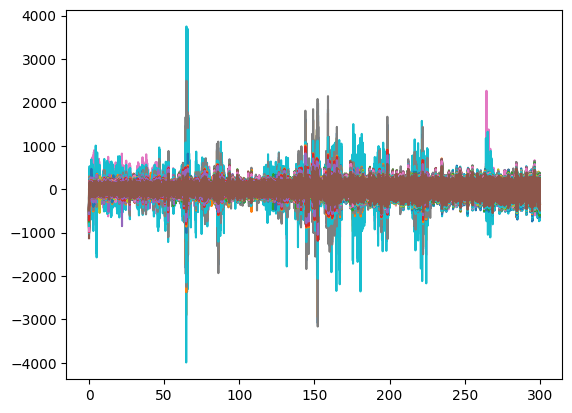

In [53]:
plt.plot(data_256_Hz);

## Troubleshooting allData concatenation

In [58]:
d128 = np.array(data_128_Hz)
d256 = np.array(data_256_Hz)

In [62]:
print(data_128_Hz.shape)
data_128_Hz.tail(1)

(38462, 256)


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
299.9958,-628.68,-499.395,-460.98,-379.08,-310.44,-307.515,-350.22,-314.34,-317.07,-323.115,...,-320.58,-282.555,-238.485,-257.985,-215.085,-181.155,-223.86,-204.75,-292.695,-477.555


In [64]:
allData = pd.DataFrame(np.empty((0,256)))

In [65]:
allData

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255


In [73]:
allData = pd.concat([allData, data_128_Hz])
allData

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0.0000,-466.635,-382.785,-461.955,-410.865,-430.755,-503.880,-529.815,-477.555,-526.110,-466.440,...,-462.540,-561.015,-775.125,-848.640,-703.170,-550.485,-746.265,-710.190,-573.105,-492.765
0.0078,-430.365,-414.570,-459.030,-419.640,-479.505,-491.790,-513.630,-477.165,-452.400,-343.395,...,-317.460,-465.660,-696.735,-763.815,-635.505,-560.820,-707.850,-688.545,-526.500,-380.640
0.0156,-510.315,-433.875,-497.445,-451.425,-490.425,-478.530,-513.825,-478.140,-509.535,-455.910,...,-399.750,-508.365,-725.790,-764.205,-633.945,-536.250,-711.360,-688.350,-521.040,-410.280
0.0234,-302.055,-239.655,-318.435,-281.775,-283.530,-282.555,-318.630,-277.680,-319.410,-288.405,...,-237.705,-329.940,-511.290,-538.980,-445.575,-363.675,-510.900,-472.875,-335.205,-232.050
0.0312,-414.570,-323.700,-382.395,-333.060,-331.500,-355.290,-375.570,-338.130,-407.355,-409.500,...,-373.620,-412.620,-550.485,-609.180,-464.685,-380.250,-531.765,-493.545,-345.930,-281.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299.9646,66.690,26.520,24.180,6.045,7.215,9.360,16.965,45.630,70.200,132.600,...,172.965,81.900,17.550,33.150,-5.655,-33.150,-31.005,-27.690,-9.750,49.140
299.9724,-128.115,-147.420,-158.340,-132.015,-103.350,-95.160,-119.145,-72.345,-63.765,-43.875,...,33.930,-39.780,-61.425,-51.675,-80.925,-77.220,-101.205,-83.655,-81.315,-70.395
299.9802,-383.760,-346.515,-340.275,-324.870,-255.060,-220.935,-259.740,-219.960,-208.650,-188.370,...,-143.520,-195.195,-192.855,-191.295,-192.270,-164.385,-191.880,-172.575,-202.995,-264.420
299.9880,-530.985,-428.415,-386.685,-343.200,-317.655,-261.300,-292.305,-270.660,-280.800,-247.260,...,-247.455,-244.335,-239.265,-255.840,-223.470,-168.870,-218.205,-213.915,-258.570,-407.550


In [74]:
allData.index[-1]

np.float64(299.99580000000003)